In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Representation\ Discrimination/data

description_style_frequency_ethnic5132_100_exp2.png
description_style_frequency_ethnic5132_100.png
description_style_frequency_nonethnic5133_100_exp2.png
description_style_frequency_nonethnic5133_100.png
description_style_frequency.png
ethnic_100_gemini15Flash_annotated.csv
ethnic_100_gemini15Flash_annotated_exp2.csv
ethnic-article-finding-process.png
ethnic_dataset_4893_after_removing_rakhain.csv
ethnic_dataset_cleaned.joblib
ethnic_dataset_exp0_5342_annotated_1-151.csv
ethnic_dataset_exp0_5342_gemini1.5flash_annotate_1_100.joblib
ethnic_dataset_exp0_5342_gemini1.5flash_annotate_1_100_nonethnic.joblib
genre_frequency_ethnic5132_100_exp2.png
genre_frequency_nonethnic5133_100_exp2.png
genre_frequency_nonethnic5133_100.png
genre_frequency.png
nonethnic_100_gemini15Flash_annotated.csv
nonethnic_100_gemini15Flash_annotated_exp2.csv
nonethnic_dataset_100k.joblib
nonethnic_dataset_exp0_5342_gemini1.5flash_annotate_1_100.joblib
nonethnic_dataset.joblib
SolaimanLipi.ttf


In [ ]:
import pandas as pd
import joblib
nonethnic_articles = joblib.load("/content/drive/MyDrive/Representation Discrimination/data/nonethnic_dataset_100k.joblib")
len(nonethnic_articles)

100003

In [ ]:
nonethnic_articles[0]

'<p>কার্তিক শেষ হলো কাল। আজ অগ্রহায়ণের প্রথম দিন। শীতের আগমনী বার্তা এখন রাজধানীর আকাশে-বাতাসে। এমন আবহাওয়ায় গতকাল সন্ধ্যায় সেগুনবাগিচার শিল্পকলা একাডেমির জাতীয় নাট্যশালায় মিলনায়তন নিক্বণধ্বনিতে জমে উঠেছিল। এখানে শুরু হয় নয় দিনের দ্বিতীয় জাতীয় নৃত্যনাট্য উৎসব।<br />সোমবার সন্ধ্যায় শিল্পকলা একাডেমির মূল হলে উৎসবের উদ্বোধন করেন অর্থমন্ত্রী আবুল মাল আবদুল মুহিত। অর্থমন্ত্রী সমাজ রক্ষা, উন্নয়ন, মানবিক গুণাবলি বিকাশের জন্যও নৃত্যনাট্য চর্চার গুরুত্ব রয়েছে বলে মন্তব্য করেন। তিনি বলেন, ‘সংস্কৃতির নানা মাধ্যমের মধ্যে নৃত্যনাট্য একটি শক্তিশালী মাধ্যম, যা নানা শিক্ষা দেয়। এই মাধ্যম থেকে রস আস্বাদন করে আমরা সমৃদ্ধ হতে পারি।’<br />অনুষ্ঠানে বিশেষ অতিথির বক্তব্য দেন সংস্কৃতিসচিব আকতারী মমতাজ। আরও বক্তব্য দেন নাট্যব্যক্তিত্ব নাসির উদ্দীন ইউসুফ, প্রবীণ নৃত্যশিল্পী রাহিজা খানম ও বাংলাদেশ নৃত্যশিল্পী সংস্থার সভাপতি মিনু হক। সভাপতিত্ব করেন শিল্পকলা একাডেমির মহাপরিচালক লিয়াকত আলী। রাহিজা খানম সংস্কৃতি খাতে বাজেটের অপ্রতুলতার দিকটি তুলে ধরে বলেন, ‘বাজেটের জন্য আমরা অনেক ভালো কাজ করতে চেয়েও পারি না।’ তার 

### COREX

In [ ]:
!pip install corextopic
!!wget -O stop_words.txt https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt


['--2024-08-17 04:55:53--  https://raw.githubusercontent.com/aljubaer/Topic-Modeling-in-Bengali/master/code/stop_words.txt',
 'Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...',
 'Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 5443 (5.3K) [text/plain]',
 'Saving to: ‘stop_words.txt’',
 '',
 '',
 'stop_words.txt        0%[                    ]       0  --.-KB/s               ',
 'stop_words.txt      100%[===================>]   5.32K  --.-KB/s    in 0s      ',
 '',
 '2024-08-17 04:55:53 (32.8 MB/s) - ‘stop_words.txt’ saved [5443/5443]',
 '']

In [ ]:
stopwords_file = open('stop_words.txt', "r+", encoding='utf-8')
all_stopwords = stopwords_file.read()
stopwords = [word.strip() for word in all_stopwords.split()]
print(stopwords)

['অতএব', 'অথচ', 'অথবা', 'অনুযায়ী', 'অনেক', 'অনেকে', 'অনেকেই', 'অন্তত', 'অন্য', 'অবধি', 'অবশ্য', 'অর্থাত', 'আই', 'আগামী', 'আগে', 'আগেই', 'আছে', 'আজ', 'আদ্যভাগে', 'আপনার', 'আপনি', 'আবার', 'আমরা', 'আমাকে', 'আমাদের', 'আমার', 'আমি', 'আর', 'আরও', 'ই', 'ইত্যাদি', 'ইহা', 'উচিত', 'উত্তর', 'উনি', 'উপর', 'উপরে', 'এ', 'এঁদের', 'এঁরা', 'এই', 'একই', 'একটি', 'একবার', 'একে', 'এক্', 'এখন', 'এখনও', 'এখানে', 'এখানেই', 'এটা', 'এটাই', 'এটি', 'এত', 'এতটাই', 'এতে', 'এদের', 'এব', 'এবং', 'এবার', 'এমন', 'এমনকী', 'এমনি', 'এর', 'এরা', 'এল', 'এস', 'এসে', 'ঐ', 'ও', 'ওঁদের', 'ওঁর', 'ওঁরা', 'ওই', 'ওকে', 'ওখানে', 'ওদের', 'ওর', 'ওরা', 'কখনও', 'কত', 'কবে', 'কমনে', 'কয়েক', 'কয়েকটি', 'করছে', 'করছেন', 'করতে', 'করবে', 'করবেন', 'করলে', 'করলেন', 'করা', 'করাই', 'করায়', 'করার', 'করি', 'করিতে', 'করিয়া', 'করিয়ে', 'করে', 'করেই', 'করেছিলেন', 'করেছে', 'করেছেন', 'করেন', 'কাউকে', 'কাছ', 'কাছে', 'কাজ', 'কাজে', 'কারও', 'কারণ', 'কি', 'কিংবা', 'কিছু', 'কিছুই', 'কিন্তু', 'কী', 'কে', 'কেউ', 'কেউই', 'কেখা', 'কেন', 'কোটি', 'কোন', 'কোনও'

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from corextopic import corextopic as ct
import scipy.sparse as ss
import regex

def custom_analyzer(text):
    words = regex.findall(r'\w{2,}', text) # extract words of at least 2 letters
    for w in words:
        yield w

vectorizer = CountVectorizer(stop_words=stopwords, analyzer = custom_analyzer, max_features=50000, binary=True)
doc_word = vectorizer.fit_transform(nonethnic_articles)
doc_word = ss.csr_matrix(doc_word)

doc_word.shape # n_docs x m_words

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:547: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(


(100003, 50000)

In [ ]:
words = list(np.asarray(vectorizer.get_feature_names_out()))

In [ ]:
not_digit_inds = [ind for ind,word in enumerate(words) if not word.isdigit()]
doc_word = doc_word[:,not_digit_inds]
words    = [word for ind,word in enumerate(words) if not word.isdigit()]

doc_word.shape # n_docs x m_words


(100003, 48906)

In [ ]:
words[10000:10020]

['কানু',
 'কানুন',
 'কানুনের',
 'কানে',
 'কানেকটিকাট',
 'কানেকটিভিটি',
 'কানেকশন',
 'কানেক্ট',
 'কানেক্টিভিটি',
 'কানের',
 'কান্ট্রি',
 'কান্ডারি',
 'কান্ত',
 'কান্তি',
 'কান্তে',
 'কান্দাপাড়া',
 'কান্দাহার',
 'কান্দি',
 'কান্দিরপাড়',
 'কান্দে']

In [ ]:
anchors_genre_mapping = {
    "Politics": ["নির্বাচন", "দল", "মন্ত্রী", "সংসদ", "ভোট", "প্রার্থী", "সরকার"],
    "Crime": ["হত্যা", "ডাকাতি", "ধর্ষণ", "মামলা", "পুলিশ", "গ্রেফতার", "জেল"],
    "International Affairs": ["জাতিসংঘ", "বৈঠক", "যুদ্ধ", "শান্তি", "চুক্তি", "কূটনীতি"],
    "Business & Economy": ["শেয়ারবাজার", "বিনিয়োগ", "মুদ্রাস্ফীতি", "ব্যাংক", "বাণিজ্য", "বাজেট"],
    "Sports": ["খেলা", "ক্রিকেট", "ফুটবল", "ম্যাচ", "স্বর্ণপদক", "প্রতিযোগিতা"],
    "Culture & Entertainment": ["সিনেমা", "নাটক", "সংগীত", "উৎসব", "নাচ", "অভিনয়"],
    "Jobs": ["নিয়োগ", "পরীক্ষা", "চাকরি", "কর্মসংস্থান", "ইন্টারভিউ"],
    "Lifestyle": ["ফ্যাশন", "খাদ্য", "ভ্রমণ", "বাড়ি", "স্বাস্থ্য", "রূপচর্চা"],
    "Health": ["রোগ", "চিকিৎসা", "হাসপাতাল", "স্বাস্থ্যবিধি", "ওষুধ", "টিকা"],
    "Environment": ["জলবায়ু", "দূষণ", "বনায়ন", "প্রাণী", "সংরক্ষণ", "নদী"],
    "Local News": ["ইউনিয়ন", "গ্রাম", "মসজিদ", "সড়ক", "উন্নয়ন", "বাজার"],
    "Education": ["পাঠ্যক্রম", "স্কুল", "পরীক্ষা", "শিক্ষার্থী", "শিক্ষক", "বিশ্ববিদ্যালয়"],
    "Technology": ["আইটি", "মোবাইল", "ইন্টারনেট", "সফটওয়্যার", "ডেটা", "প্রযুক্তি"],
    "Religion": ["ইসলাম", "মসজিদ", "ধর্ম", "পূজা", "উপাসনা", "ধর্মপ্রচার"],
    "Science": ["গবেষণা", "বিজ্ঞানী", "আবিষ্কার", "প্রযুক্তি", "মহাকাশ", "পরিবেশ"],
    "Protests and Social Movements": ["বিক্ষোভ", "ধর্মঘট", "আন্দোলন", "মানববন্ধন", "অধিকার", "পিকেটিং"],
    "Government Actions": ["নীতি", "উন্নয়ন", "বাজেট", "প্রকল্প", "আইন", "প্রশিক্ষণ"]
}

In [ ]:
anchors = anchors_genre_mapping.values()
corex_model = ct.Corex(n_hidden=50, seed=1)
corex_model.fit(doc_word, words=words, anchors=anchors, anchor_strength=3, docs=nonethnic_articles)

In [ ]:
corex_model.tc

55.4916729561928

In [ ]:
topics = corex_model.get_topics()
for topic_n, topic in enumerate(topics):
    # w: word, mi: mutual information, s: sign
    topic = [(w, mi, s) if s > 0 else ('~' + str(w), mi, s) for w, mi, s in topic]
    # Unpack the info about the topic
    topic_words, mis, signs = zip(*topic)

    topic_str = str(topic_n + 1) + ': ' + ', '.join(topic_words)
    print(topic_str)


1: সরকার, নির্বাচন, সংসদ, প্রার্থী, মন্ত্রী, ভোট, নির্বাচনে, সরকারের, দল, নির্বাচনের
2: পুলিশ, মামলা, হত্যা, গ্রেফতার, থানার, ঘটনায়, থানায়, উদ্ধার, ওসি, পুলিশের
3: বৈঠক, চুক্তি, শান্তি, যুদ্ধ, প্রেসিডেন্ট, জাতিসংঘ, মার্কিন, দেশটির, যুক্তরাষ্ট্রের, যুক্তরাষ্ট্র
4: ব্যাংক, বাণিজ্য, বাজেট, ব্যাংকের, শতাংশ, প্রতিষ্ঠান, অর্থ, খাতে, পণ্য, খাতের
5: ম্যাচ, ক্রিকেট, খেলা, ফুটবল, ম্যাচে, বিপক্ষে, রান, ম্যাচের, উইকেট, দলের
6: নাটক, উৎসব, সিনেমা, সংগীত, গান, অভিনয়, ছবির, ছবি, শিল্পী, গানের
7: পরীক্ষা, হবে, জন্য, হলে, দিতে, নিতে, পর্যন্ত, আরও, সিদ্ধান্ত, থাকবে
8: স্বাস্থ্য, খাদ্য, বাড়ি, ভ্রমণ, ফ্যাশন, কমপ্লেক্সে, কমপ্লেক্সের, কমপ্লেক্স, স্বাস্থ্যসেবা, পুষ্টি
9: চিকিৎসা, হাসপাতাল, হাসপাতালে, ওষুধ, মেডিকেল, রোগ, টিকা, কলেজ, আক্রান্ত, হাসপাতালের
10: নদী, সংরক্ষণ, পানি, প্রাণী, নদীর, পানির, পানিতে, দূষণ, বৃষ্টি, মাটি
11: বাজার, গ্রাম, মসজিদ, সড়ক, উন্নয়ন, নির্মাণ, ইউনিয়ন, নির্মাণের, ভবন, সরেজমিনে
12: শিক্ষক, পরীক্ষা, শিক্ষার্থী, স্কুল, বিশ্ববিদ্যালয়ের, শিক্ষার্থীদের, বিশ্ববিদ্যালয়, শিক্ষা, শিক্ষার্থ

In [ ]:
top_docs = corex_model.get_top_docs(n_docs=20000, sort_by="tc")
THRESHOLD = 25.0
docs_per_topic = []
total_docs = 0
for topic_n, top_docs in enumerate(top_docs):
    docs, probs = zip(*top_docs)
    top_docs_above_threshold = [doc for doc,prob in zip(docs,probs) if prob > THRESHOLD]
    docs_per_topic.append(top_docs_above_threshold)
    total_docs += len(top_docs_above_threshold)
    print(f'Topic {topic_n}: {len(top_docs_above_threshold)}')
print(total_docs)

Topic 0: 1139
Topic 1: 2568
Topic 2: 1185
Topic 3: 1235
Topic 4: 3750
Topic 5: 1589
Topic 6: 28
Topic 7: 21
Topic 8: 987
Topic 9: 892
Topic 10: 124
Topic 11: 1000
Topic 12: 669
Topic 13: 1210
Topic 14: 882
Topic 15: 609
Topic 16: 502
Topic 17: 1
Topic 18: 1553
Topic 19: 1257
Topic 20: 482
Topic 21: 757
Topic 22: 1276
Topic 23: 23
Topic 24: 74
Topic 25: 435
Topic 26: 540
Topic 27: 1705
Topic 28: 137
Topic 29: 702
Topic 30: 28
Topic 31: 10
Topic 32: 255
Topic 33: 563
Topic 34: 436
Topic 35: 494
Topic 36: 1603
Topic 37: 29
Topic 38: 365
Topic 39: 3
Topic 40: 159
Topic 41: 229
Topic 42: 9
Topic 43: 986
Topic 44: 5
Topic 45: 227
Topic 46: 92
Topic 47: 113
Topic 48: 404
Topic 49: 97
33439


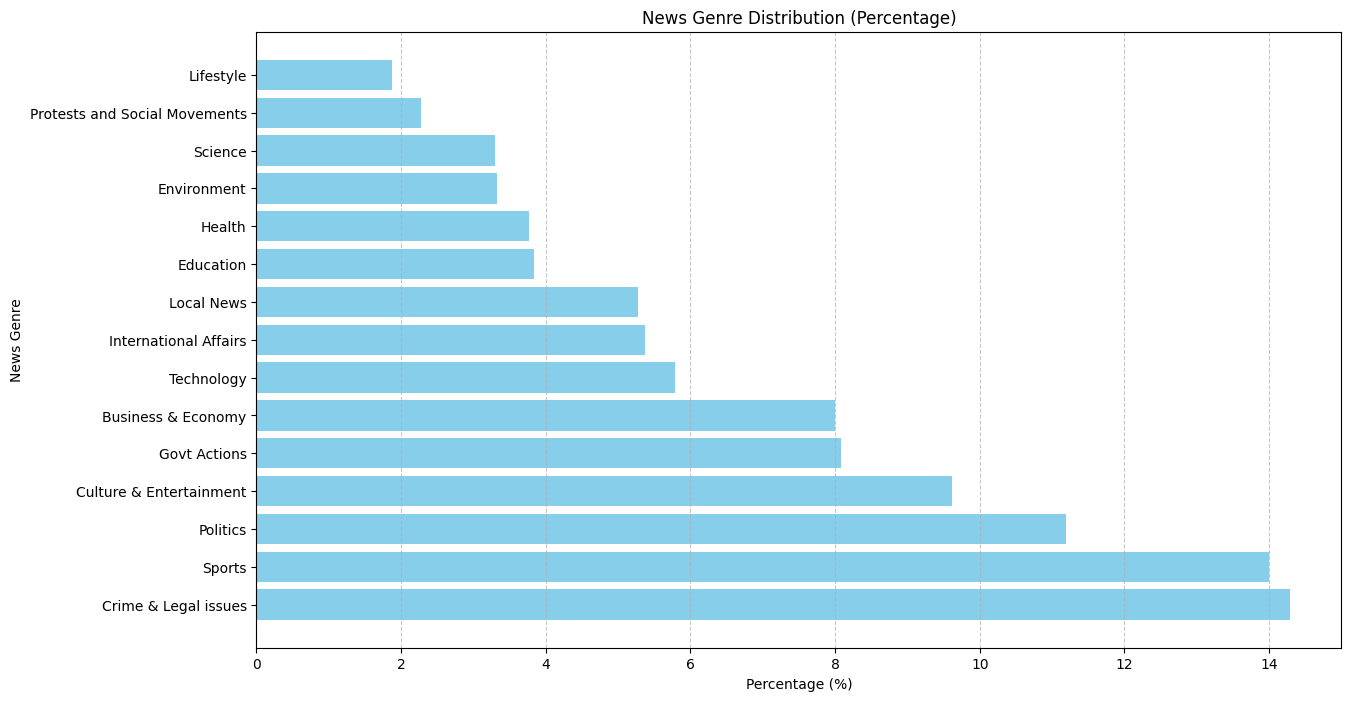

In [ ]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Raw data
data = [
    (1139, 'Politics, Govt Actions'),
    (2568, 'Crime & Legal issues'),
    (1185, 'International Affairs'),
    (1235, 'Business & Economy'),
    (3750, 'Sports'),
    (1589, 'Culture & Entertainment'),
    (28, 'Education'),
    (21, 'Health, Lifestyle'),
    (987, 'Health'),
    (892, 'Environment'),
    (124, 'Local News, Govt Actions'),
    (1000, 'Education'),
    (669, 'Technology'),
    (882, 'Science, Technology'),
    (609, 'Protests and Social Movements'),
    (502, 'Govt Actions, Business & Economy'),
    (1257, 'Crime & Legal issues'),
    (482, 'Lifestyle'),
    (757, 'Local News'),
    (74, 'Govt Actions'),
    (435, 'Local News'),
    (255, 'International Affairs, Politics'),
    (1603, 'Politics'),
    (986, 'Culture & Entertainment'),
    (227, 'Govt Actions'),
    (404, 'Business & Economy'),
    (97, 'Local News, Govt Actions'),
]

# Aggregating the data by genre and skipping "General"
genre_counts = defaultdict(int)

for count, genres in data:
    if 'General' not in genres:  # Skipping any entry with "General"
        for genre in genres.split(','):
            genre_counts[genre.strip()] += count

# Calculate total counts
total_counts = sum(genre_counts.values())

# Convert counts to percentages
genre_percentages = {genre: (count / total_counts) * 100 for genre, count in genre_counts.items()}

# Sorting the genres for better visualization
sorted_genres = sorted(genre_percentages.items(), key=lambda item: item[1], reverse=True)

# Plotting the data
plt.figure(figsize=(14, 8))
genres, percentages = zip(*sorted_genres)
plt.barh(genres, percentages, color='skyblue')
plt.xlabel('Percentage (%)')
plt.ylabel('News Genre')
plt.title('News Genre Distribution (Percentage)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
TIME = "150824"
EXPERIMENT_NAME = "nonethnic_100k_corex"

In [ ]:
joblib.dump(docs_per_topic, "/content/drive/MyDrive/Representation Discrimination/{EXPERIMENT_NAME}_docs_per_topic_{TIME}.joblib")

['/content/drive/MyDrive/Representation Discrimination/{EXPERIMENT_NAME}_docs_per_topic_{TIME}.joblib']

In [ ]:
import joblib
temp = joblib.load("/content/drive/MyDrive/Representation Discrimination/nonethnic_dataset.joblib")
len(temp)

5343